In [37]:
# Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards
# specific topics or brands.

In [69]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [70]:
data=pd.read_csv("twitter_training.csv")

In [71]:
data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [72]:
col_names=['ID','entity','Sentiments','Contest']
socialmedia_data=pd.read_csv('twitter_training.csv',names=col_names)

In [73]:
socialmedia_data.isnull().sum()

ID              0
entity          0
Sentiments      0
Contest       686
dtype: int64

In [74]:
socialmedia_data.dropna(axis=0,inplace=True)

In [75]:
socialmedia_data.duplicated().sum()

2340

In [76]:
socialmedia_data.drop_duplicates(inplace=True)

In [77]:
sentiment_counts = socialmedia_data['Sentiments'].value_counts()
sentiment_counts

Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: Sentiments, dtype: int64

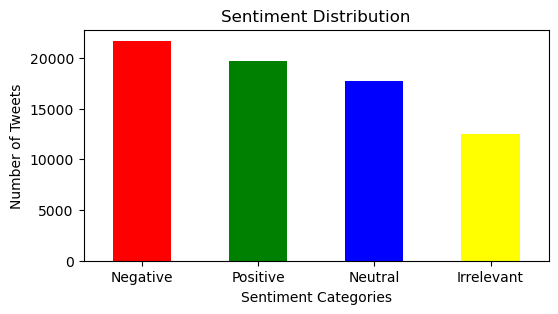

In [78]:
plt.figure(figsize=(6, 3))
sentiment_counts.plot(kind='bar', color=['red', 'green', 'blue', 'yellow'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Categories')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [79]:
def get_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    elif -0.05 <= polarity <= 0.05: 
        return 'Neutral'
    else:
        return 'Irrelevant'

In [80]:
socialmedia_data['Sentiment_Score'] = socialmedia_data['Contest'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
socialmedia_data['Sentiments'] = socialmedia_data['Sentiment_Score'].apply(get_sentiment)


In [81]:
sentiment_counts = socialmedia_data['Sentiments'].value_counts()
print("Sentiment distribution:")
print(sentiment_counts)

Sentiment distribution:
Positive      27846
Neutral       22096
Negative      16085
Irrelevant     5629
Name: Sentiments, dtype: int64


In [82]:
brand_data = socialmedia_data[socialmedia_data['entity'].str.contains('Microsoft', case=False)]
brand_sentiment_counts = brand_data['Sentiments'].value_counts()
print("\nBrand Sentiment Counts ('Microsoft'):")
print(brand_sentiment_counts)



Brand Sentiment Counts ('Microsoft'):
Positive      954
Neutral       765
Negative      405
Irrelevant    180
Name: Sentiments, dtype: int64


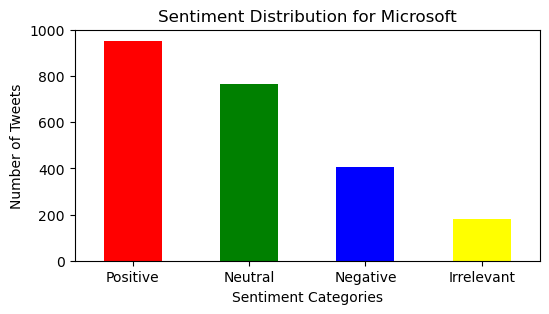

In [83]:
plt.figure(figsize=(6, 3))
brand_sentiment_counts.plot(kind='bar', color=['red', 'green', 'blue', 'yellow'])
plt.title('Sentiment Distribution for Microsoft')
plt.xlabel('Sentiment Categories')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [84]:
all_tweets = " ".join(tweet for tweet in socialmedia_data['Contest'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

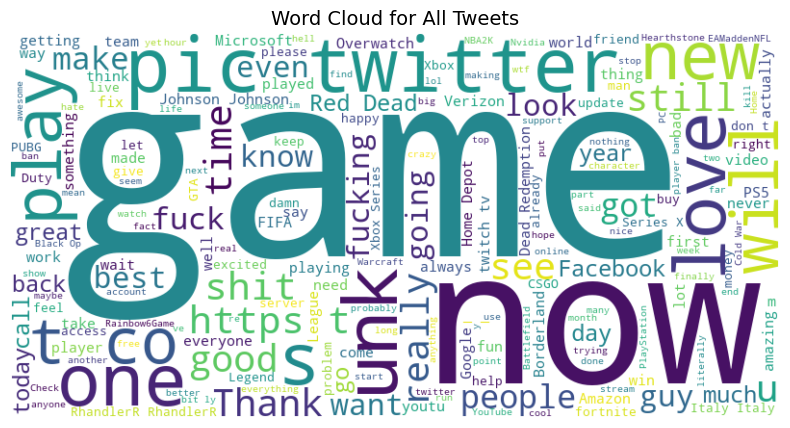

In [85]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for All Tweets', fontsize=14)
plt.show()

In [86]:
positive_tweets = " ".join(tweet for tweet in brand_data[brand_data['Sentiments'] == 'Positive']['Contest'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

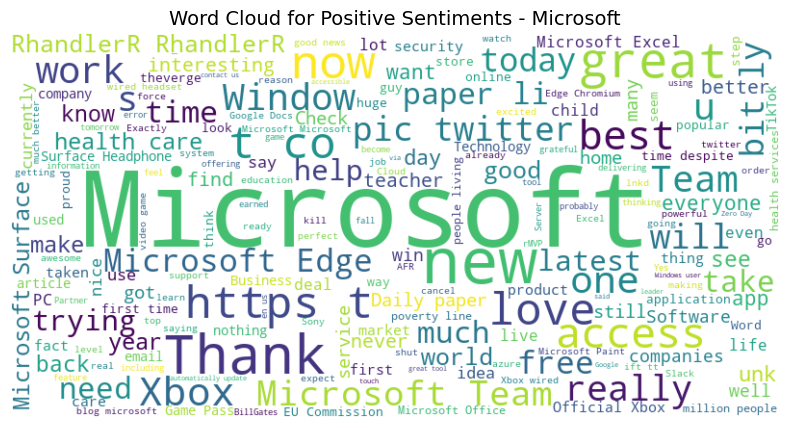

In [87]:
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Positive Sentiments - Microsoft', fontsize=14)
plt.show()

In [88]:
negative_tweets = " ".join(tweet for tweet in brand_data[brand_data['Sentiments'] == 'Negative']['Contest'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)


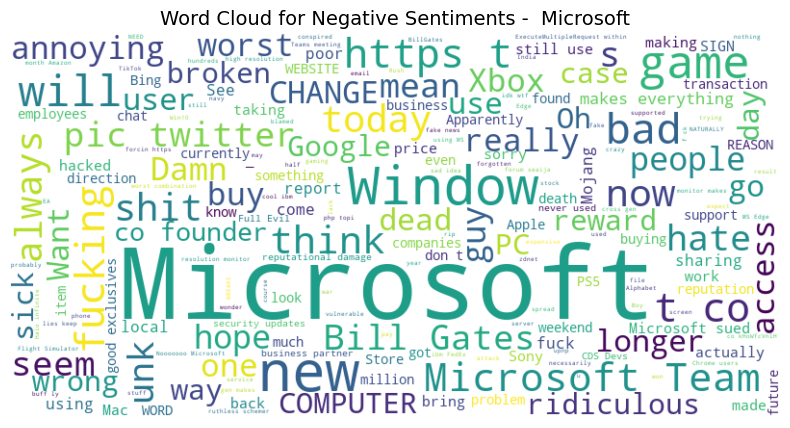

In [89]:
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Negative Sentiments -  Microsoft', fontsize=14)
plt.show()